In [3]:
# import necessary lobraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(font_scale=1.1)

# from google.colab import files

In [4]:
# upload heart.csv form pc
# uploaded = files.upload()
df = pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


###### Attribute Information
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [5]:
# basic info about rows , columns and data types
print("Shape: ", df.shape)

Shape:  (918, 12)


In [6]:
print("Info: ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Info:  None


In [7]:
# quick descriptive statistics for numeric columns
df.describe().T   # T = transpose

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### 2. Define target and feature types

In [8]:
# targer and feature types
target_col = "HeartDisease"

numeric_col = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
categorical_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

print(target_col)
print(numeric_col)
print(categorical_col)

HeartDisease
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


## Exploratory Data Annalysis(EDA)
###  3. Missing values and basic quality checks

In [9]:
# EDA starts from here
# check missing values count per column
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# look at some basic value ranges
df[numeric_col].agg(['min','max','mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [11]:
for c in categorical_col:
    print(c,df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


### 4.Understanding Distributions with Histograms and Boxplots [Numerical Features]

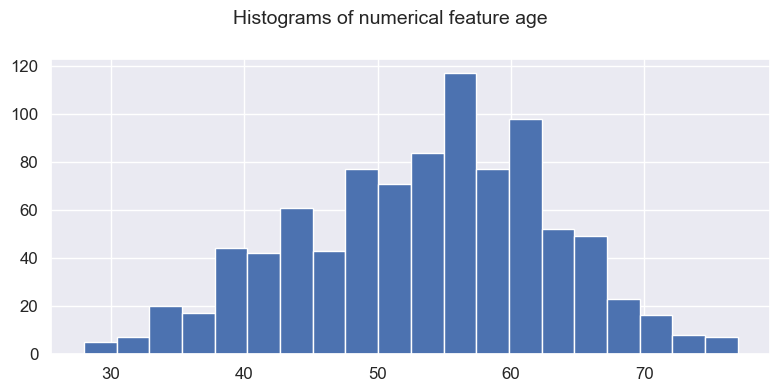

In [12]:
# histogram for numeric features
df['Age'].hist(bins=20 , figsize=(8,4))
plt.suptitle("Histograms of numerical feature age",fontsize=14)
plt.tight_layout()
plt.show()

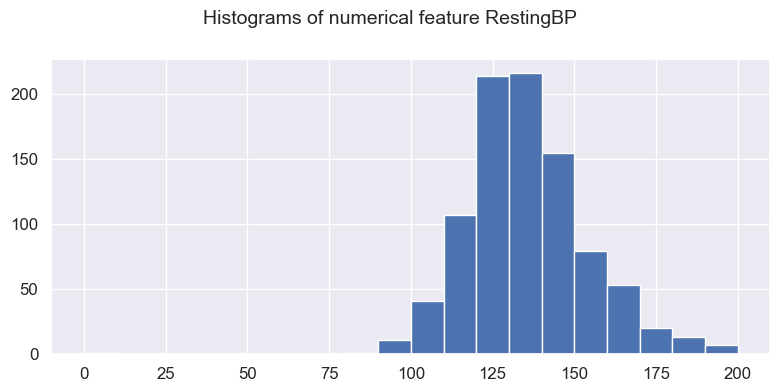

In [13]:
df['RestingBP'].hist(bins=20 , figsize=(8,4))
plt.suptitle("Histograms of numerical feature RestingBP",fontsize=14)
plt.tight_layout()
plt.show()

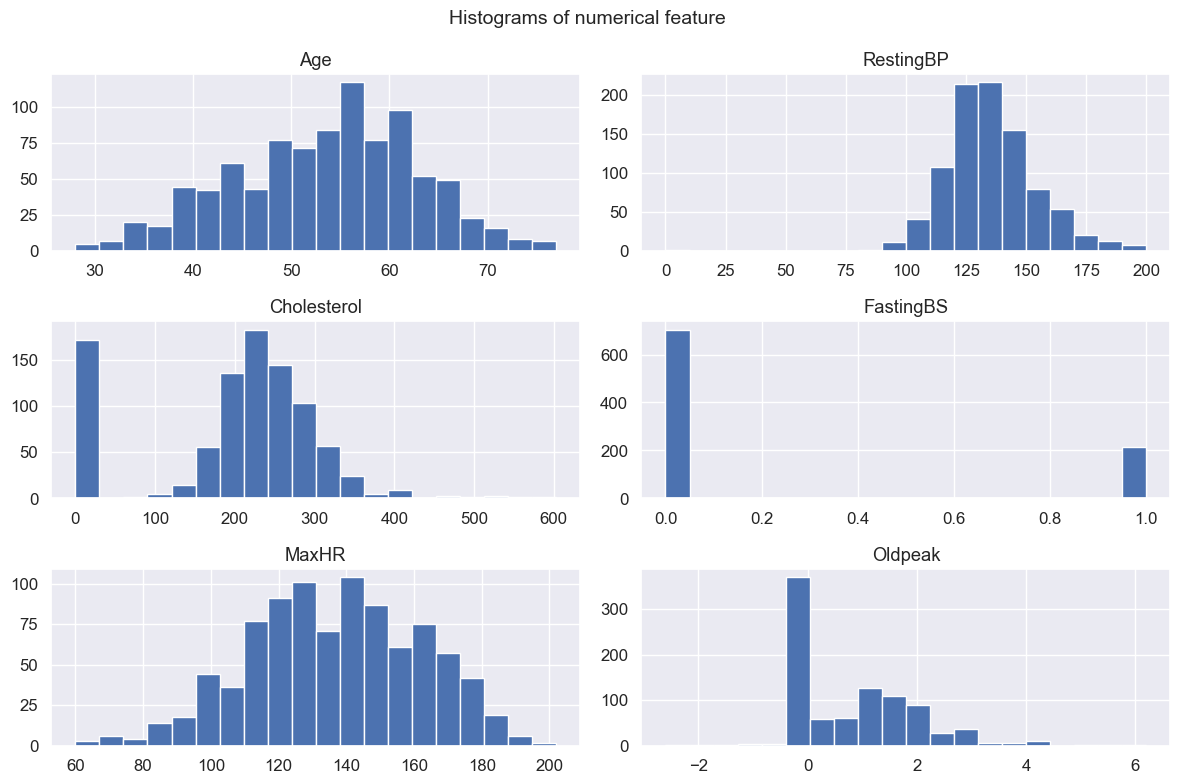

In [28]:
# all together
df[numeric_col].hist(bins=20 , figsize=(12,8))
plt.suptitle("Histograms of numerical feature ",fontsize=14)
plt.tight_layout()
plt.show()

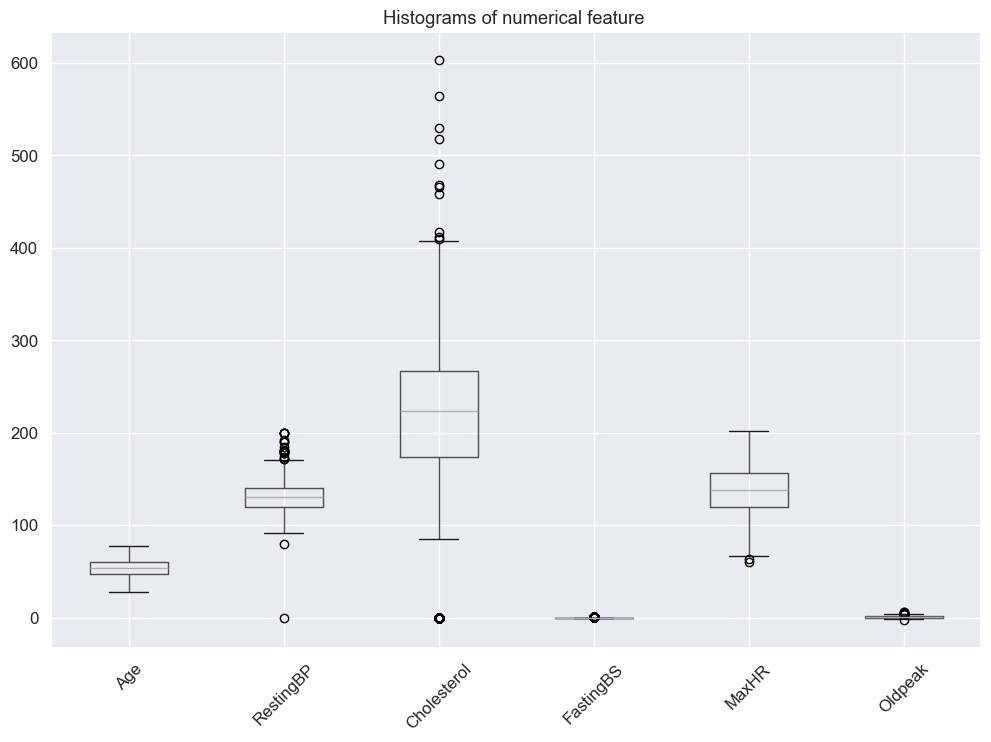

In [15]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df[numeric_col].boxplot()
# df.boxplot(column= numeric_col[0])  #it's for specific feature
plt.title("Histograms of numerical feature ")
plt.xticks(rotation=45)
plt.show()

### 5. Target distribution and class imbalance

Text(0, 0.5, 'Count')

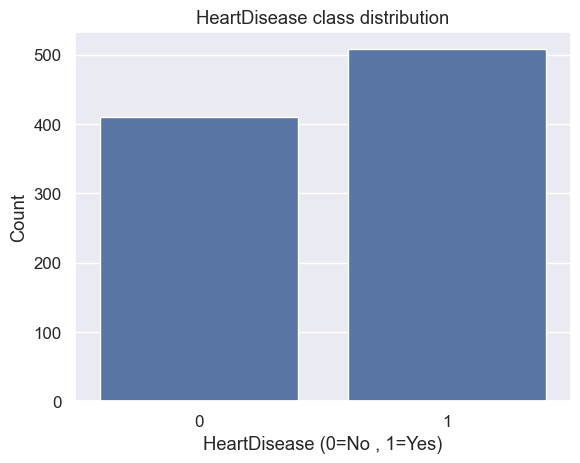

In [16]:
# plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("HeartDisease class distribution")
plt.xlabel("HeartDisease (0=No , 1=Yes)")
plt.ylabel("Count")
# plt.tight_layout()

In [17]:
# patcentage of each possiblity
df[target_col].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

### 6. Categorical feature exploration

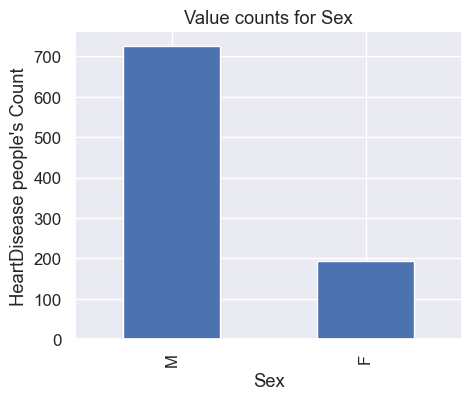

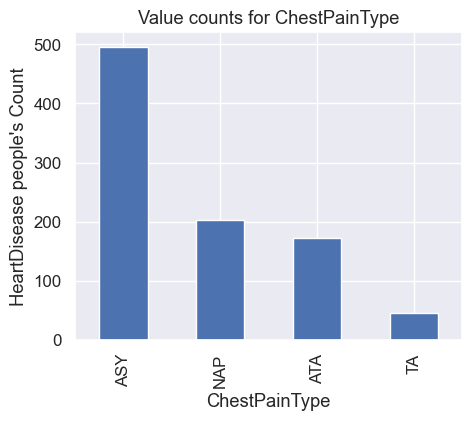

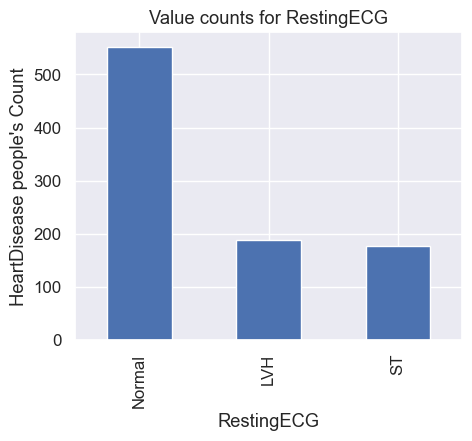

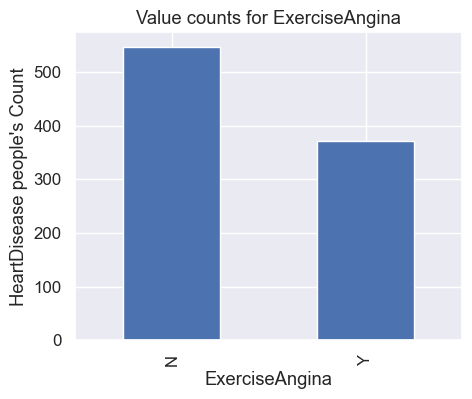

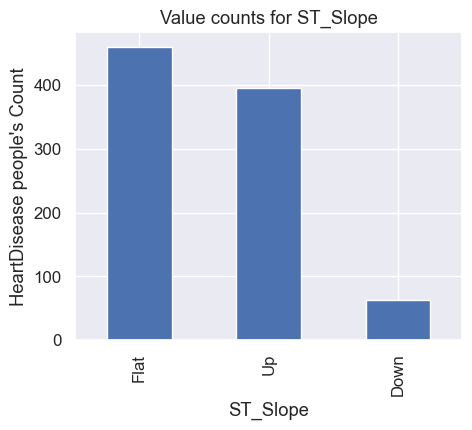

In [29]:
for c in categorical_col:
    plt.figure(figsize=(5,4))
    df[c].value_counts().plot(kind="bar")
    plt.title(f"Value counts for {c}")
    plt.ylabel("HeartDisease people's Count")  
    plt.show()

 ### 7. Relationships between features and target

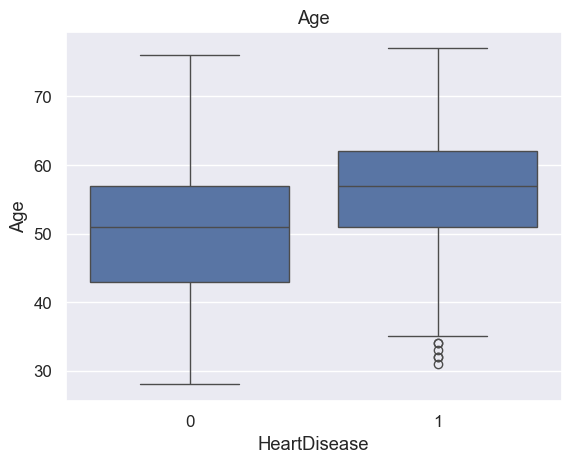

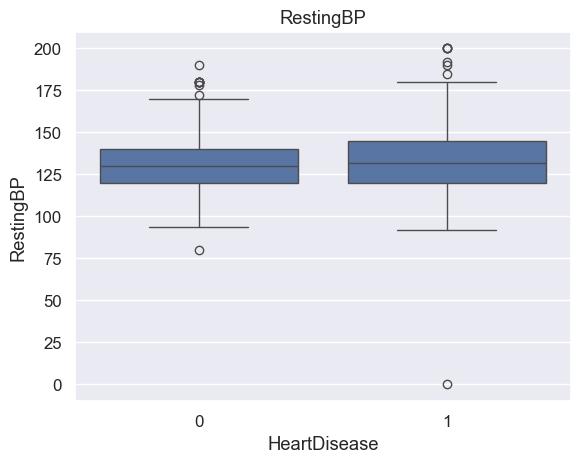

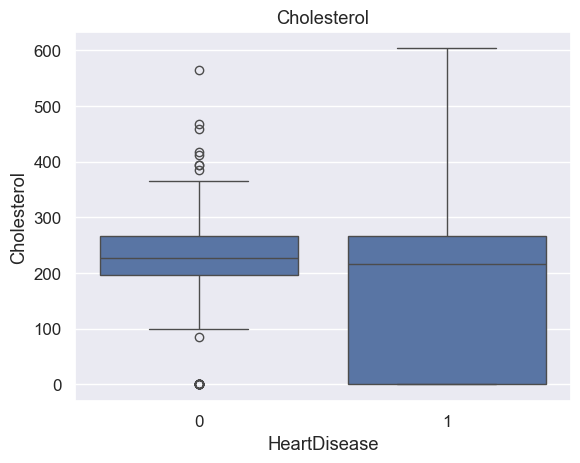

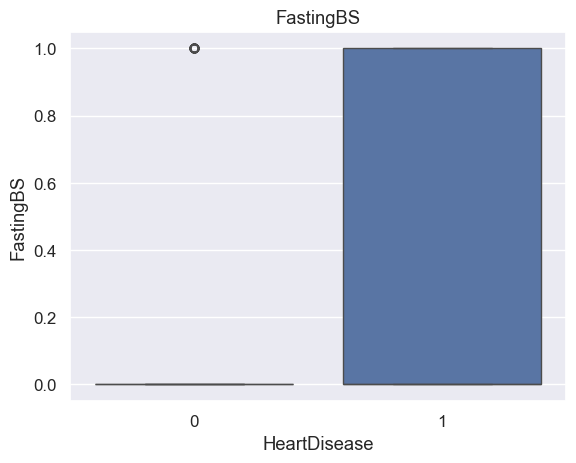

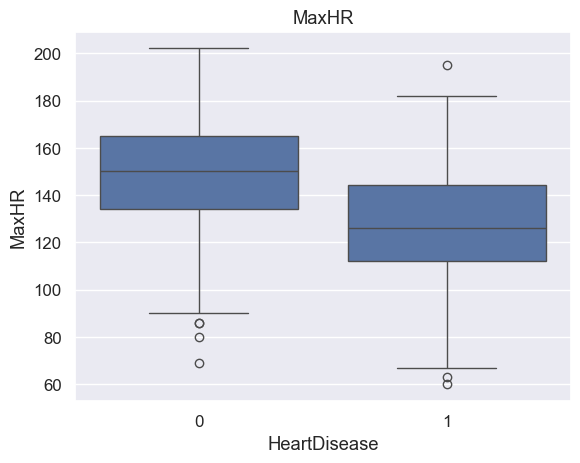

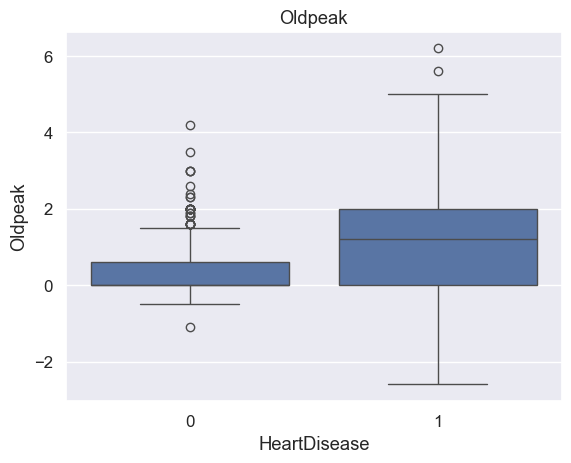

In [19]:
# boxplots of numeric features split by heartdisease
for i,col in enumerate(numeric_col , 1):
    # plt.subplot(2,3,i)
    sns.boxplot(x=df[target_col] , y=df[col])
    plt.title(col)
    plt.show()

### 7.1. Pairplot for a subset of features

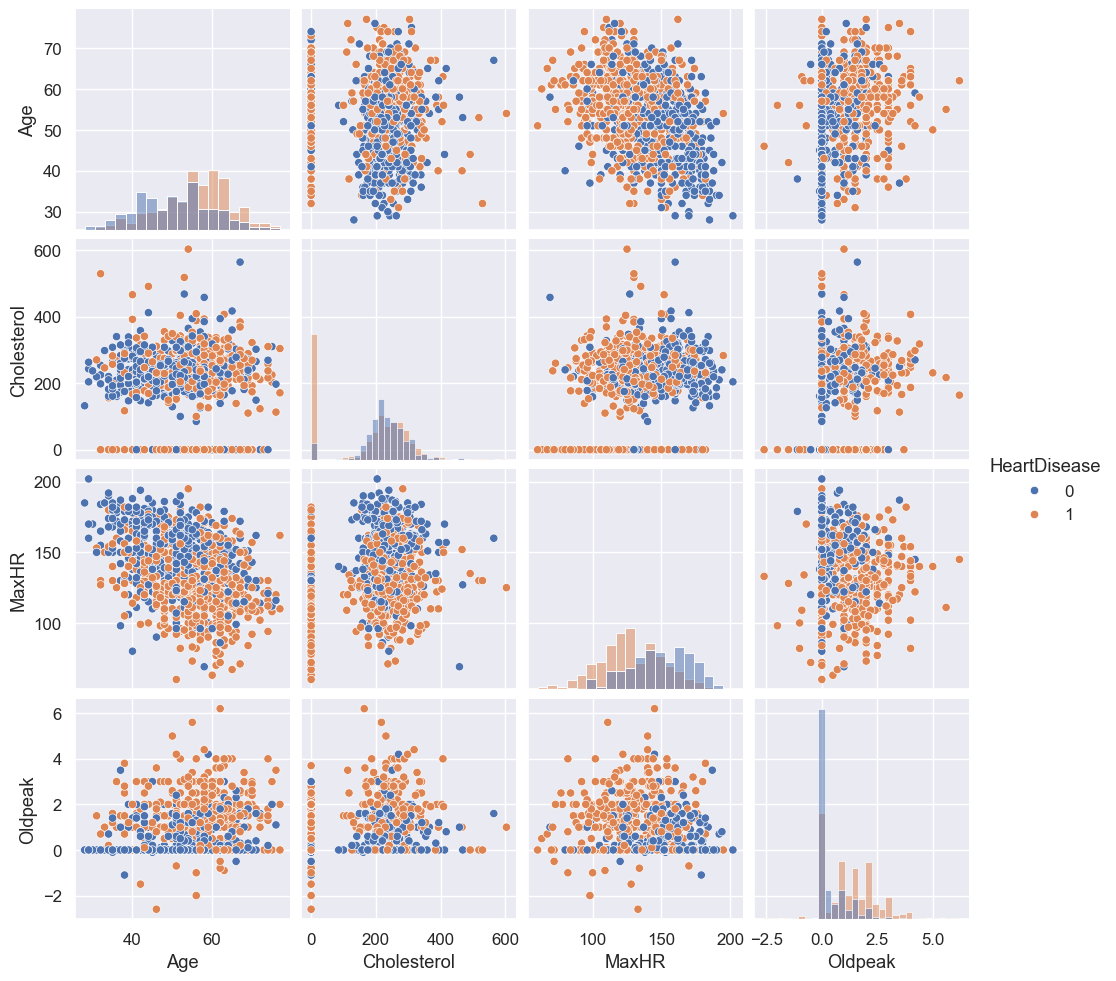

In [20]:
sns.pairplot(df[['Age','Cholesterol','MaxHR','Oldpeak','HeartDisease']], hue="HeartDisease",diag_kind='hist')
plt.show()

### 7.2. Correlation matrix and heatmap

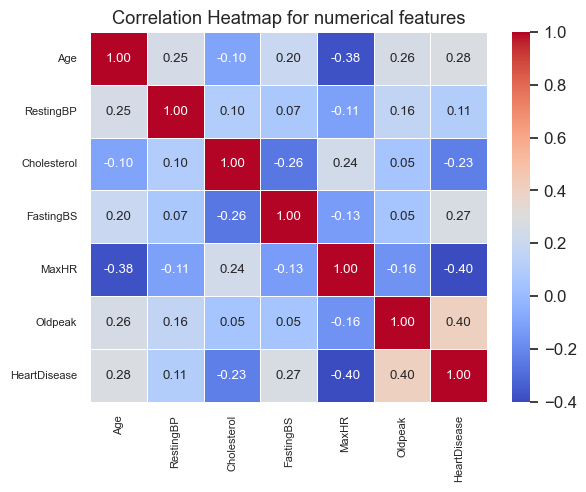

In [25]:
corr_matrix = df[numeric_col + [target_col]].corr()
sns.heatmap(corr_matrix, annot=True , cmap="coolwarm",fmt='.2f',linewidths=0.5, annot_kws={"size":9.5})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Correlation Heatmap for numerical features")
plt.show()

In [22]:
corr_matrix[target_col].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

### 7.3. Categorical features vs target


Proportion of HeartDisease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


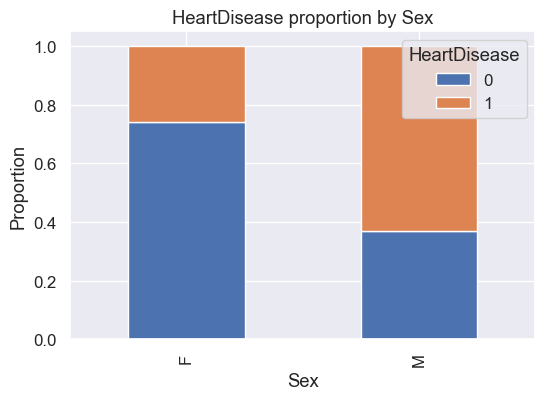


Proportion of HeartDisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


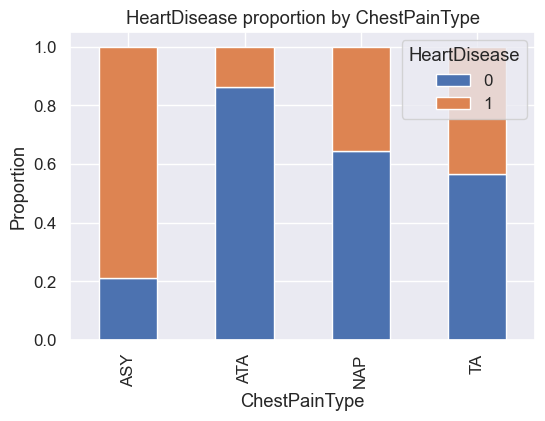


Proportion of HeartDisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


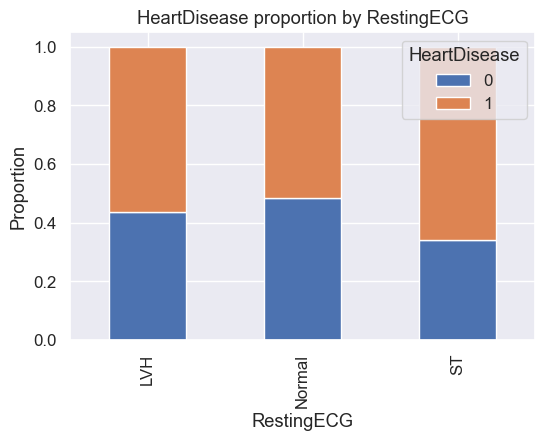


Proportion of HeartDisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


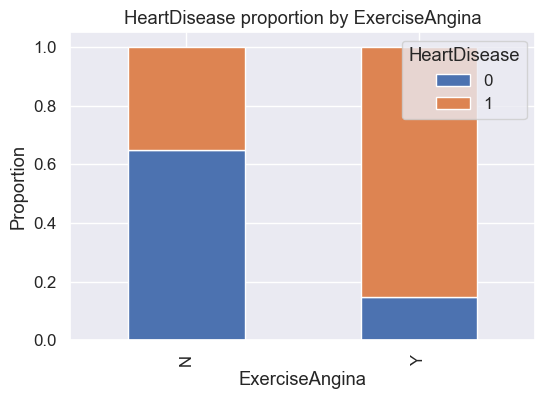


Proportion of HeartDisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


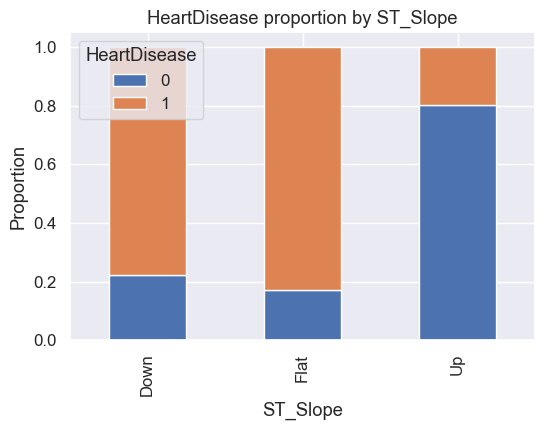

In [23]:
for c in categorical_col:
    ct = pd.crosstab(df[c],df[target_col],normalize='index')
    print(f'\nProportion of HeartDisease within {c}')
    display(ct)

    ct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"HeartDisease proportion by {c}")
    plt.ylabel("Proportion")
    plt.show()